In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df =pd.read_csv("C:/Users/Deo Prakash/Downloads/Polynomial Regression/position_salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [46]:
df.isnull().sum().any()

False

In [47]:
df.duplicated().values

array([False, False, False, False, False, False, False, False, False,
       False])

In [48]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [49]:
df['Position'].unique

<bound method Series.unique of 0     Business Analyst
1    Junior Consultant
2    Senior Consultant
3              Manager
4      Country Manager
5       Region Manager
6              Partner
7       Senior Partner
8              C-level
9                  CEO
Name: Position, dtype: object>

C:\Users\Deo Prakash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Deo Prakash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


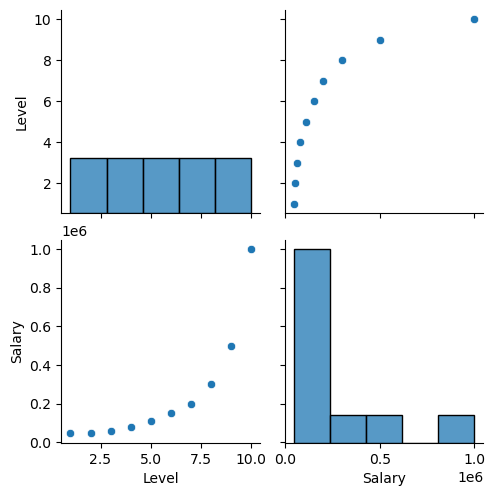

In [50]:
sns.pairplot(df)

In [51]:
df2 = df.drop(['Position'],axis=True)
df.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [52]:
X = df2.drop(['Salary'], axis = True)
Y= df2['Salary']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [55]:
((x_train.shape), (x_test.shape), (y_train.shape), (y_test.shape))

((8, 1), (2, 1), (8,), (2,))

In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [57]:
lr_model = regressor.fit(x_train,y_train)

In [58]:
lr_model

LinearRegression()

In [59]:
y_pred=lr_model.predict(x_test)
y_pred

array([550732.75862069, -64482.75862069])

In [60]:
lr_model.score(x_train, y_train)

0.6366049276570868

In [61]:
lr_model.score(x_test, y_test)

0.8451346684575975

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x_train)
regressor1= LinearRegression()
regressor1.fit(x_poly, y_train)
x_poly_test = poly_reg.transform(x_test)

Accuracy Scores

In [64]:
regressor1.score(x_poly, y_train)

0.9995857211026754

In [65]:
regressor1.score(x_poly_test, y_test)

0.9714666803841595

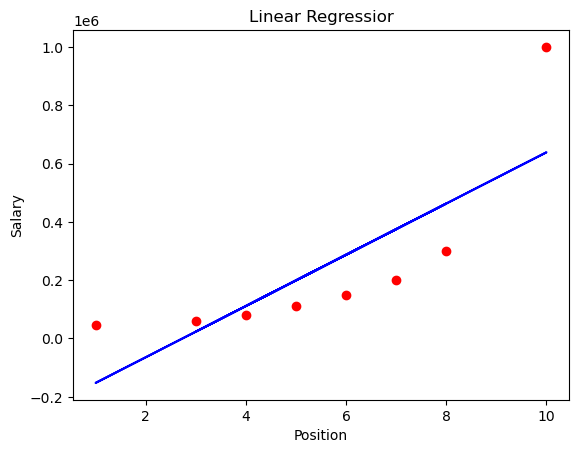

In [66]:
plt.scatter(x_train,y_train, color='r')
plt.plot(x_train, regressor.predict(x_train), color='b')
plt.title('Linear Regressior')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

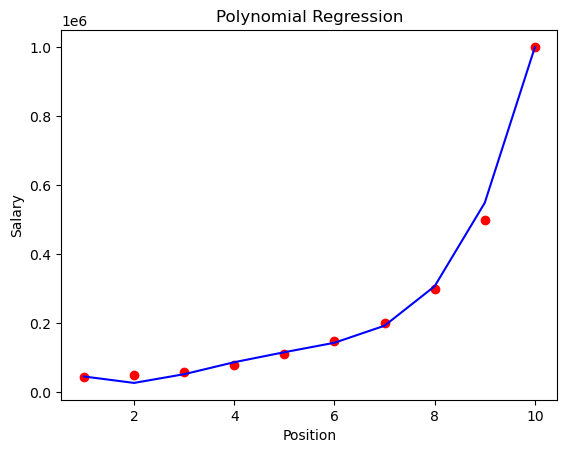

In [67]:
plt.scatter(X,Y, color='r')
plt.plot(X, regressor1.predict(poly_reg.fit_transform(X)), color='b')
plt.title('Polynomial Regression')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

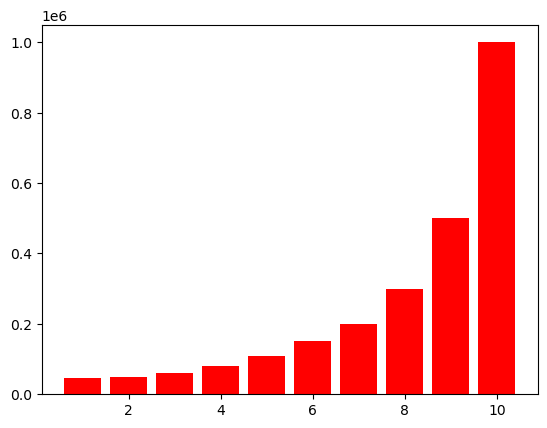

In [68]:
plt.bar(df['Level'], df['Salary'], color='r')
plt.show()